In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Preprocessed_pca.csv', index_col = 0)
df

,PhysHlth,BMI,MentHlth,Income,Diabetes_binary
0,-6.667397,-6.392123,-1.111675,-0.458052,0
1,-3.863936,-7.178304,3.095224,-0.072141,0
2,-0.834798,0.081819,-3.494618,-4.087203,0
3,7.085908,-6.207388,-6.370345,-2.893083,0
4,-4.274580,7.404026,0.413793,1.106787,0
...,...,...,...,...,...
253659,-3.320172,9.505420,0.697311,0.792966,1
253668,-5.022866,1.523446,-0.484450,-2.206810,1
253670,2.529385,-4.995248,11.196980,-6.451818,1
253676,-6.559798,-9.188122,-1.661467,-3.481757,1


In [3]:
X = df[['PhysHlth', 'BMI', 'MentHlth', 'Income']]
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 1)

In [4]:
accuracy_list = []
accuracy_metric_list = []
accuracy_k_list = []
precision_list = []
precision_metric_list = []
precision_k_list = []
f1_list = []
f1_metric_list = []
f1_k_list = []

In [5]:
k_range = [i for i in range(0,105)]
k_value = k_range[1:30:2]
#k_value = [i for i in range(1, 30)]

## Trial 1

In [6]:
start = datetime.now()

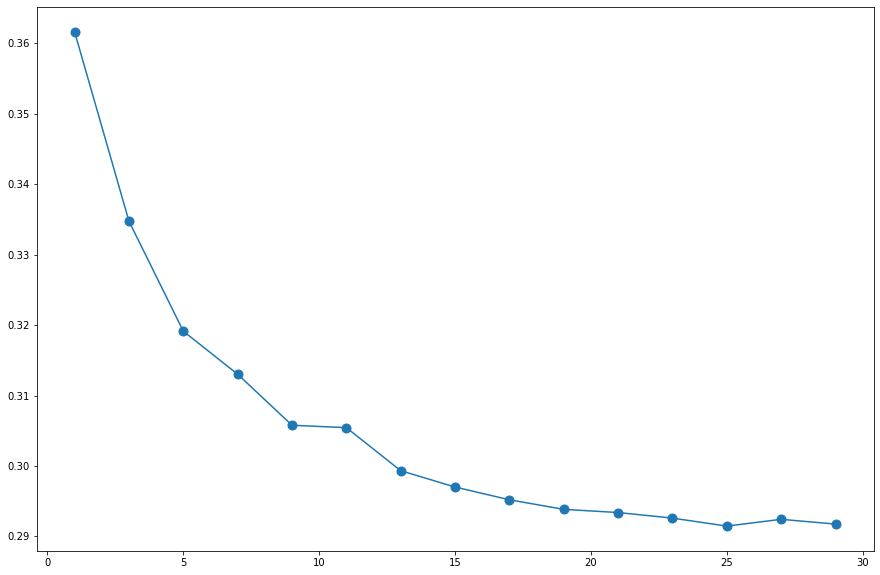

In [7]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [8]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [9]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.7085384484807333


In [10]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [11]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 25): 0.6282745182940029


In [12]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [13]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6453150603307016


## Trial 2

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 2)

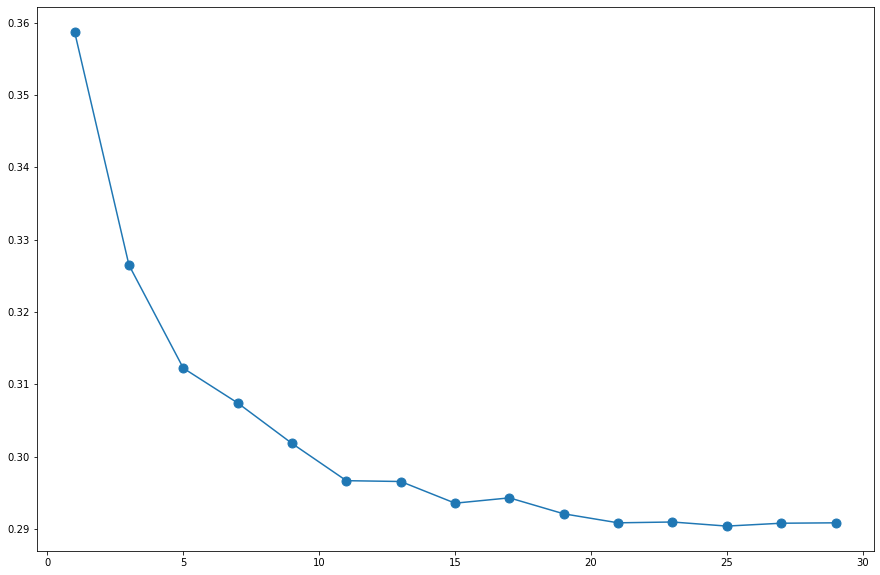

In [15]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [16]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [17]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.709613534770554


In [18]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [19]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 23): 0.6263081395348837


In [20]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [21]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.640060015003751


## Trial 3

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 3)

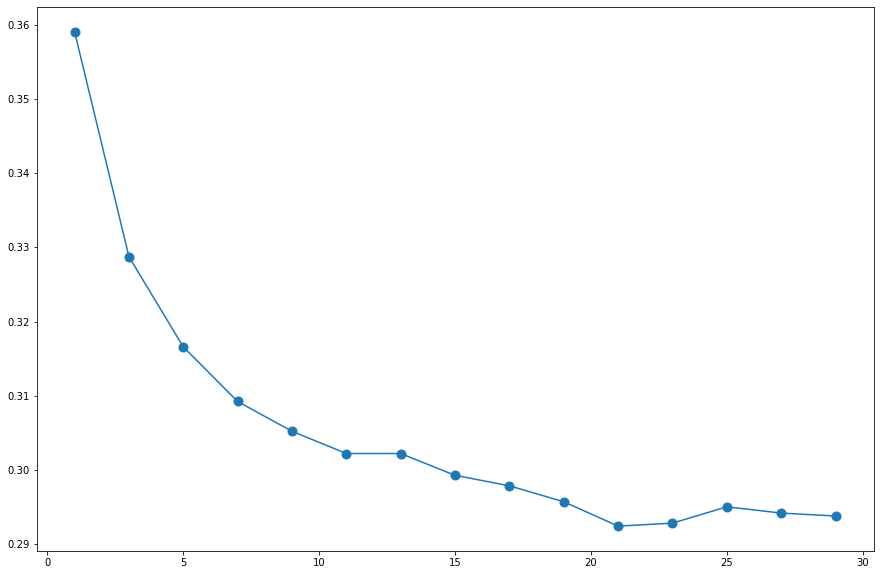

In [23]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [24]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [25]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 21): 0.7075765291687885


In [26]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [27]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 21): 0.6277193487970033


In [28]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [29]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 21): 0.6368951907615845


## Trial 4

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 4)

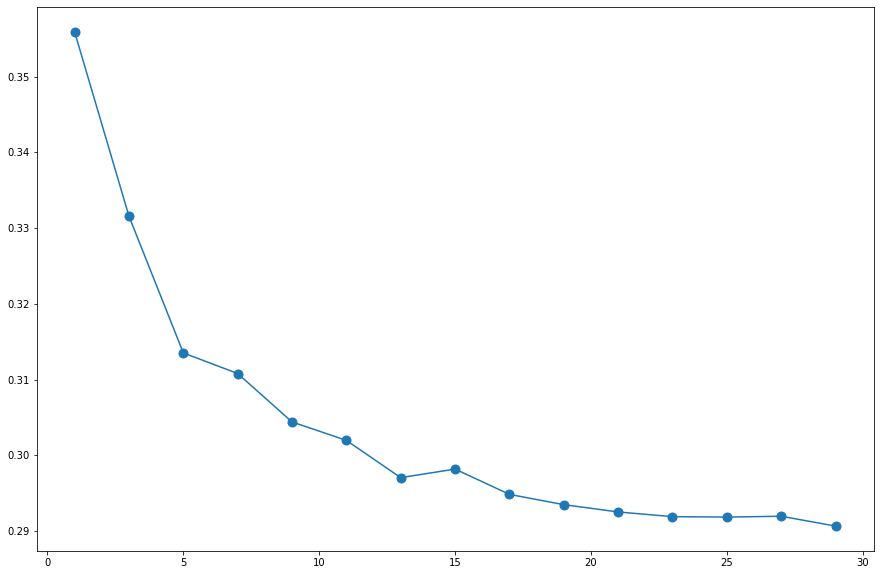

In [31]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [32]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [33]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7093306173258643


In [34]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [35]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6262097067598049


In [36]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [37]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6402321083172147


## Trial 5

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 5)

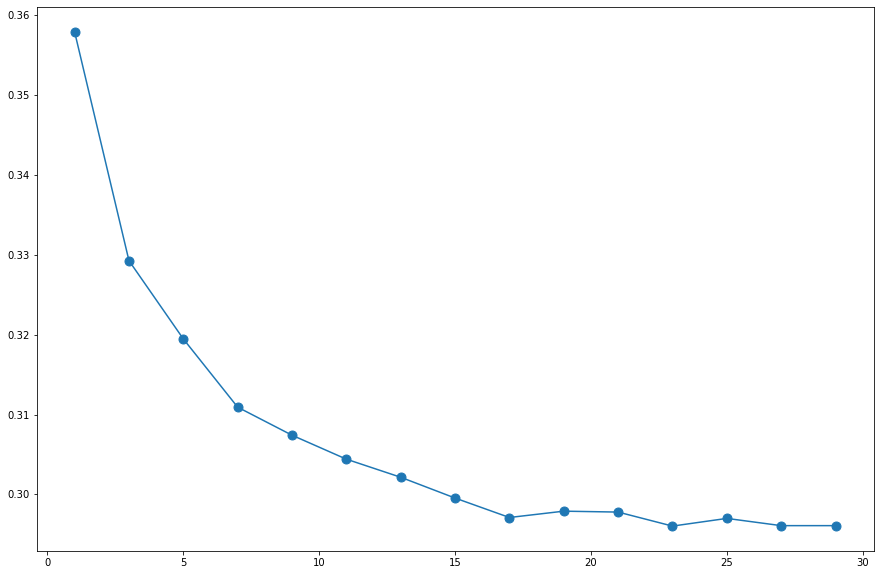

In [39]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [40]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [41]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 23): 0.7039551858767612


In [42]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [43]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 23): 0.6280392435660458


In [44]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [45]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6330645161290323


## Trial 6

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 6)

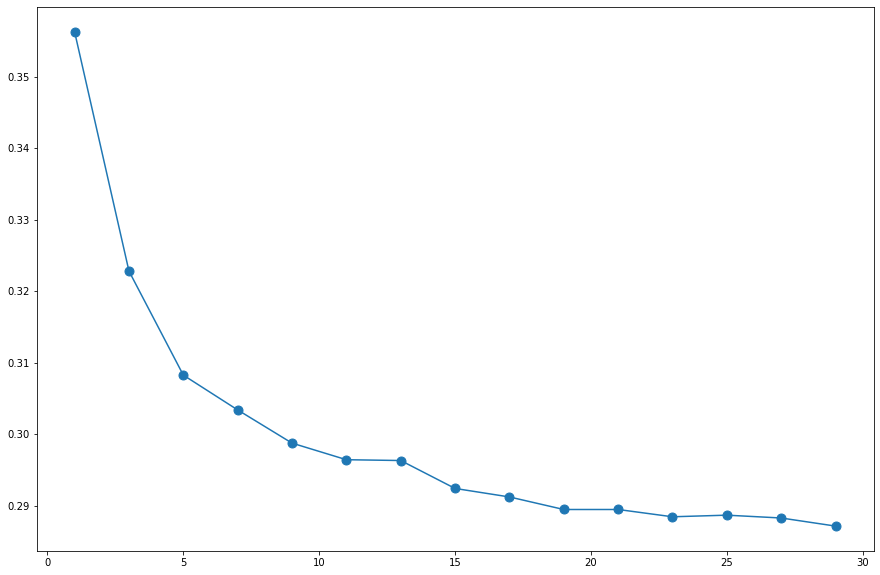

In [47]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [48]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [49]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7128387936400158


In [50]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [51]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6342869496288824


In [52]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [53]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6423879725587506


## Trial 7

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 7)

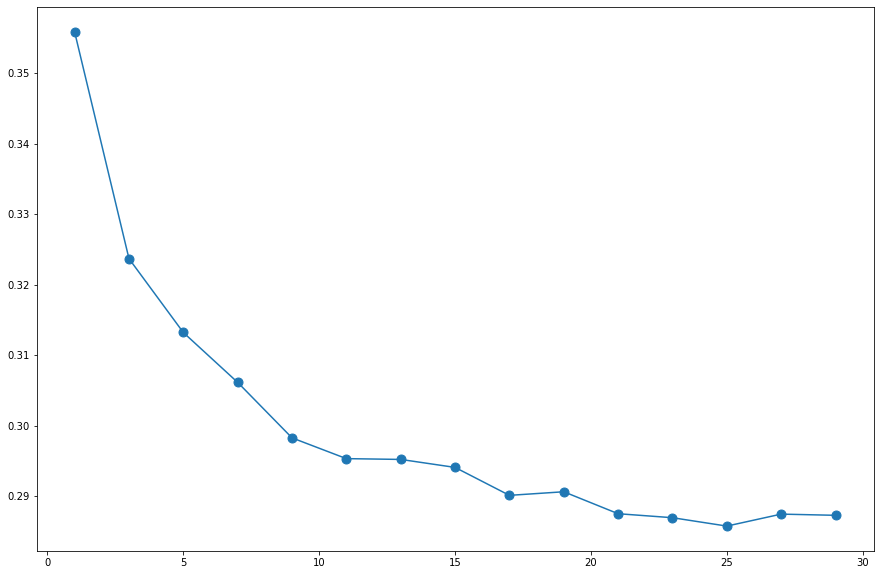

In [55]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [56]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [57]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.7141967973745261


In [58]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [59]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 25): 0.6326812595447604


In [60]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [61]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 25): 0.6495445721965059


## Trial 8

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 8)

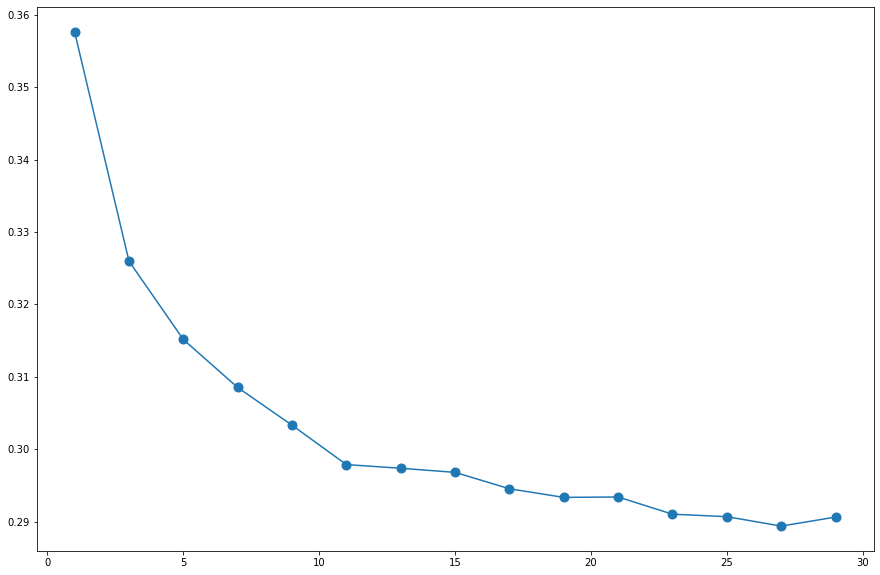

In [63]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [64]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [65]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.7105754540824988


In [66]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [67]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6283513768800406


In [68]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [69]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6457586618876942


## Trial 9

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 9)

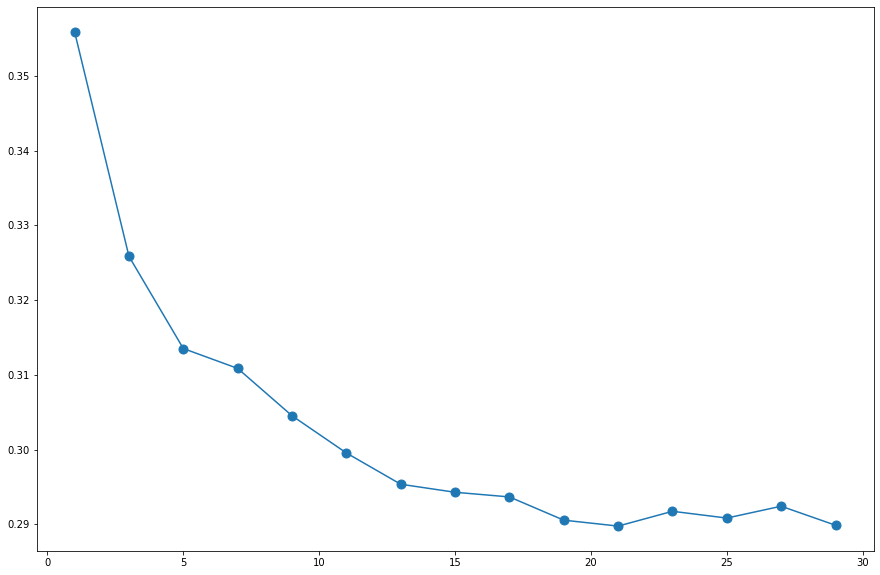

In [71]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [72]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [73]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 21): 0.7102359531488711


In [74]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [75]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 21): 0.6308657103726664


In [76]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [77]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6454301875558202


## Trial 10

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 10)

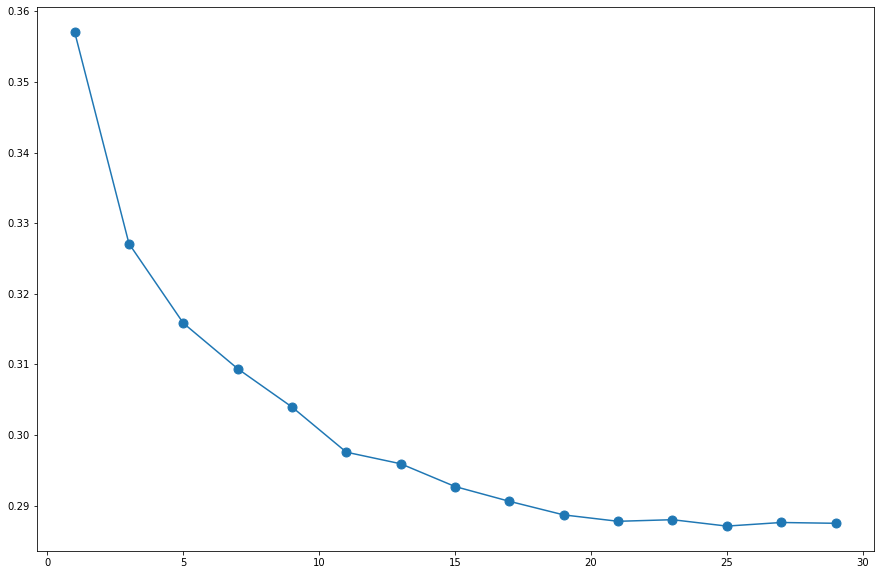

In [79]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [80]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [81]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.7128953771289538


In [82]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [83]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 21): 0.6306463326071169


In [84]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [85]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6531449407474932


In [86]:
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

Time:  0:29:45.581608


## Results

In [87]:
data = {'Accuracy': accuracy_list, 'Accuracy K': accuracy_k_list, 'Accuracy Metric': accuracy_metric_list,
        'Precision': precision_list, 'Precision K': precision_k_list, 'Precision Metric': precision_metric_list,
        'F1_micro':f1_list, 'F1_micro K': f1_k_list, 'F1_micro Metric': f1_metric_list}

In [88]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.708538,25,manhattan,0.645315,29,manhattan,0.628275,25,manhattan
1,0.709614,25,manhattan,0.640060,29,manhattan,0.626308,23,manhattan
2,0.707577,21,manhattan,0.636895,21,manhattan,0.627719,21,manhattan
3,0.709331,29,manhattan,0.640232,29,manhattan,0.626210,29,manhattan
4,0.703955,23,manhattan,0.633065,27,manhattan,0.628039,23,manhattan
5,0.712839,29,manhattan,0.642388,29,manhattan,0.634287,29,manhattan
6,0.714197,25,manhattan,0.649545,25,manhattan,0.632681,25,manhattan
7,0.710575,27,manhattan,0.645759,27,manhattan,0.628351,27,manhattan
8,0.710236,21,manhattan,0.645430,29,manhattan,0.630866,21,manhattan
9,0.712895,25,manhattan,0.653145,27,manhattan,0.630646,21,manhattan


In [89]:
trainingResults.to_csv('KNN_pca_trainingResults.csv')

### Testing Model

In [90]:
df = pd.read_csv('Preprocessed_pca.csv', index_col = 0)
trainingResults = pd.read_csv('KNN_pca_trainingResults.csv', index_col = 0)
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.708538,25,manhattan,0.645315,29,manhattan,0.628275,25,manhattan
1,0.709614,25,manhattan,0.640060,29,manhattan,0.626308,23,manhattan
2,0.707577,21,manhattan,0.636895,21,manhattan,0.627719,21,manhattan
3,0.709331,29,manhattan,0.640232,29,manhattan,0.626210,29,manhattan
4,0.703955,23,manhattan,0.633065,27,manhattan,0.628039,23,manhattan
5,0.712839,29,manhattan,0.642388,29,manhattan,0.634287,29,manhattan
6,0.714197,25,manhattan,0.649545,25,manhattan,0.632681,25,manhattan
7,0.710575,27,manhattan,0.645759,27,manhattan,0.628351,27,manhattan
8,0.710236,21,manhattan,0.645430,29,manhattan,0.630866,21,manhattan
9,0.712895,25,manhattan,0.653145,27,manhattan,0.630646,21,manhattan


In [91]:
X = df[['PhysHlth', 'BMI', 'MentHlth', 'Income']]
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 11)

In [96]:
acc = []
f1 = []
precision = []
error_rate = []
neigh = KNeighborsClassifier(n_neighbors = 25)
parameters = {"metric":['manhattan']}
search_results =  GridSearchCV(neigh, parameters)
search_results.fit(X_train, Y_train)
Y_Predicted = search_results.predict(X_test)
acc.append(search_results.score(X_test, Y_test))
f1.append(f1_score(Y_test, Y_Predicted))
precision.append(precision_score(Y_test, Y_Predicted))
error_rate.append(np.mean(Y_Predicted != Y_test))

In [97]:
print("Accuracy: " + str(acc[0]) + '\n'
      + "Precision: " + str(precision[0]) + '\n'
      + "F1: " + str(f1[0]))

Accuracy: 0.7075765291687885
Precision: 0.6387535076059666
F1: 0.6259950788826169
